In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Part I. Preprocessing

Importing Train Dataset 

In [3]:
train = pd.read_csv('train (1).csv')

Importing Test Dataset

In [5]:
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Getting info of the dataset 


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.isnull().sum().sum()

6965

Getting the columns with null values

In [9]:
train_null = pd.DataFrame(train.isnull().sum().reset_index())

Checking the Sum of Null Values

In [10]:
train_null.sum()

index    IdMSSubClassMSZoningLotFrontageLotAreaStreetAl...
0                                                     6965
dtype: object

Displaying all the columns with null values 

In [11]:
train_null.loc[train_null[0] != 0]

,index,0
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


Checking for Correlation 

In [12]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Removing Columns with Null Values 

In [163]:
index=[0,3,6,25,26,30,31,32,33,35,42,57,58,59,60,63,64,72,73,74]

In [55]:
train_clean =train.drop(train.columns[index], axis=1,inplace=False)

In [56]:
train_clean

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [57]:
train_clean.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

One-Hot Encoding 

In [58]:
X_features_encode = pd.get_dummies(train_clean, columns = {'MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'})

In [59]:
X_features_encode

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional_Sev,Functional_Typ,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Street_Grvl,Street_Pave
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,1,0,1,0,0,0,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,1,0,1,0,0,0,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,1,0,1,0,0,0,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,1,0,1,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,1,0,1,0,0,0,0,0,1
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,1,0,0,0,0,0,1
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,1,0,1,0,0,0,0,0,1
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,1,0,0,0,1,0,0,0,1


Declaring Target Variable 

In [14]:
train_hist =train['SalePrice']

Histogram of Target Variable Saleprice

<AxesSubplot:>

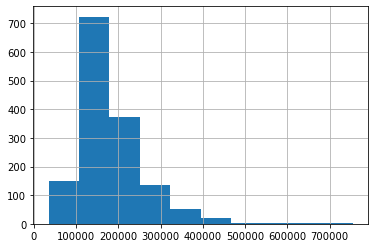

In [15]:
train_hist.hist()

Applying log for the target variable to be normally distributed 

In [76]:
Y_target_log = np.log1p(train_hist)

<AxesSubplot:>

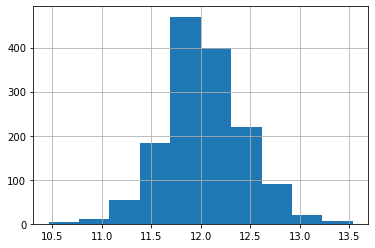

In [78]:
Y_target_log.hist()

Defining Feature Variable 

In [61]:
X_features = X_features_encode.drop(['SalePrice'], axis = 1, inplace = False)

Spillting the Training dataset into Test and Train form

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target_log, test_size=0.2, random_state=0)

Part II. Create MLAs

Linear Regression

In [133]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [143]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [134]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
Variance_score = r2_score(y_test,pred)

print('MSE: {0:.4f}, RMSE:{1:.4f}, Variance score:{2:.4f}'.format(mse,rmse,Variance_score))

MSE: 0.0516, RMSE:0.2271, Variance score:0.6593


The MSE value is 0.05, which is near to 0.5. This means that model is a good fit. 


<AxesSubplot:>

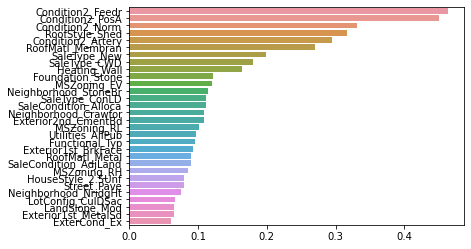

In [135]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)[:30]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

The important features used for the linear Regression  are displayed in the bar chart below.From the bar chart, we can see that the Condition2  is the two most useful features.

In [ ]:
X_features_encode_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 168 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(25), object(1), uint8(142)
memory usage: 498.8+ KB


Ridge Regression 

In [ ]:
ridge_reg = Ridge(alpha=10)

ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

In [ ]:
log_mse_eval = mean_squared_error(y_test,pred)
RMSLE = np.sqrt(log_mse_eval)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
mse_eval = mean_squared_error(y_test_exp,pred_exp)

rmse_eval = np.sqrt(mse_eval)

Variance_score1 = r2_score(y_test_exp,pred_exp)
print("RMSLE:", RMSLE)
print("MSE:", mse_eval)
print("RMSE:", rmse_eval)
print("Variance_score:",Variance_score1)

RMSLE: 0.16526741732726669
MSE: 9687971813.518011
RMSE: 98427.49521103344
Variance_score: -0.42701193509586965


The MSE value is 0.05, which is near to 0.5. This means that model is a good fit. 


<AxesSubplot:>

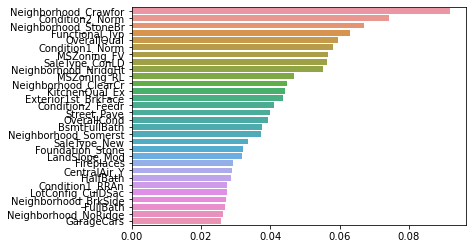

In [ ]:
coef = pd.Series(ridge_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)[:30]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

The important features used for the ridge Regression are displayed in the bar chart above.From the bar chart, we can see that the Neighborhood Crawford is the two most useful features.

LASSO Regression 

In [ ]:
lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)

In [ ]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
mse_eval = mean_squared_error(y_test_exp,pred_exp)
rmse_eval = np.sqrt(mse_eval)
variance_score=r2_score(y_test_exp,pred_exp)
print(mse_eval)
print(rmse_eval)
print(variance_score)

22604850892.69955
150349.09674720216
-2.329633140543902


<AxesSubplot:>

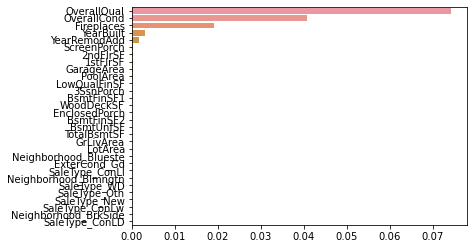

In [ ]:
coef = pd.Series(lasso_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)[:30]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

The important features used for the Lasso Regression are displayed in the bar chart below.From the bar chart, we can see that the Overall Quality is the two most useful features.

From the RMSE value of Ridge and Lasso Regression, we can interpret that Ridge Regression is the better model as it has the lowest RMSE value 

ElasticNet


In [137]:
elastic_reg = ElasticNet(alpha=0.01)
elastic_reg.fit(X_train, y_train)
pred = elastic_reg.predict(X_test)

In [138]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
Variance_score = r2_score(y_test,pred)

print('MSE: {0:.4f}, RMSE:{1:.4f}, Variance score:{2:.4f}'.format(mse,rmse,Variance_score))

MSE: 0.0459, RMSE:0.2141, Variance score:0.6971


The MSE value is 0.04, which is near to 0.5. This means that model is a good fit. 
